In [12]:
# import dependencies
%pip install psycopg2
import requests
import pandas as pd 
import numpy as np
import openpyxl
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [13]:
#format list for the dataframe
key = '6924a24c5e8fd68ab4c75b8911dde245'
state_ids = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL',
             'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
             'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE',
             'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
             'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
             'VA', 'WA', 'WI', 'WV', 'WY']

In [14]:
#create dataframe and read in the two json files holding personal expenditures and personal income per capita
for x in state_ids:
  RINCPC = f"https://api.stlouisfed.org/fred/series/observations?series_id={x}RPIPC&api_key={key}&file_type=json"
  response = requests.get(RINCPC)
  series = pd.DataFrame(response.json()["observations"])
  series["value"] = series.rename(columns={'value': x}, inplace=True)
  series = series[['date', x]]
  if x == state_ids[0]:
    df = series
  else:
    df = pd.merge(df, series, on='date', how='inner')

In [15]:
#print dataframe to csv - real income - has income per capita income per state
df.to_csv('realincome.csv', encoding='utf-8', index=False)

In [16]:
income_csv = pd.read_csv('realincome.csv')
income_csv

,date,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WI,WV,WY
0,2008-01-01,42242,51624,38967,40983,43801,46677,61514,45923,43264,...,53966,42800,46111,39101,45363,49384,47357,46757,40351,58234
1,2009-01-01,41995,50046,36641,40970,42404,44290,60539,45268,41222,...,51592,42858,43378,35790,44683,48503,44859,45576,41150,51850
2,2010-01-01,41757,53121,37162,40280,43519,44902,63476,44779,42760,...,51386,42936,44111,36432,46082,48535,45638,45543,40655,53752
3,2011-01-01,41849,54738,38384,41286,44858,45642,62986,47058,43276,...,55027,43816,46689,36776,47570,49648,46298,47258,41704,55954
4,2012-01-01,41617,55069,39253,43016,46170,46712,62599,46587,43193,...,52730,44341,47581,37963,47494,50704,48625,47869,41807,58962
5,2013-01-01,41356,53511,39171,42407,45839,47730,60177,46599,42278,...,52096,43980,47335,38301,47120,48674,48421,47518,40670,56738
6,2014-01-01,42010,55466,40235,44095,47491,50254,62124,46908,43817,...,53856,44719,48987,39622,49298,49591,49895,48519,41592,59527
7,2015-01-01,43835,56504,41903,45429,50074,51326,63350,49657,45696,...,56578,46540,49009,42061,49460,51300,51713,50674,42149,59581
8,2016-01-01,43577,54409,42530,45891,51845,50932,64059,49888,46131,...,56333,46690,47705,43390,50635,52229,52455,50962,42098,55726
9,2017-01-01,44472,54005,44250,46835,52604,52739,64665,50850,48133,...,56740,47828,49944,43710,49930,53826,52990,51771,43731,58146


In [9]:
cms_wb = openpyxl.load_workbook('Residence_all_tables.xlsx')
Ws = cms_wb.sheetnames

In [10]:
print(Ws)

['Contents', 'Table 1 Personal Health Care', 'Table 2 Hospital', 'Table 3 Physician and Clinics', 'Table 4 Other Professionals', 'Table 5 Dental', 'Table 6 Home Health', 'Table 7 Nursing', 'Table 8 Drugs and Non-durables', 'Table 9 Durables', 'Table 10 Other Health', 'Table 11 Personal Health Care', 'Table 12 Hospital', 'Table 13 Physician and Clinics', 'Table 14 Other Professionals', 'Table 15 Dental', 'Table 16 Home Health', 'Table 17 Nursing', 'Table 18 Drugs and Non-durables', 'Table 19 Durables', 'Table 20 Other Health', 'Table 21 Population', 'Table 22 Medicare', 'Table 23 Medicare Per Enrollee', 'Table 24 Medicare Enrollment', 'Table 25 Medicaid', 'Table 26 Medicaid Per Enrollee', 'Table 27 Medicaid Enrollment', 'Table 28 Private Health', 'Table 29 Private Per Enrollee', 'Table 30 Private Enrollment']


In [17]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region/state of residence            62 non-null     object 
 1   2001.0                               60 non-null     float64
 2   2002.0                               60 non-null     float64
 3   2003.0                               60 non-null     float64
 4   2004.0                               60 non-null     float64
 5   2005.0                               60 non-null     float64
 6   2006.0                               60 non-null     float64
 7   2007.0                               60 non-null     float64
 8   2008.0                               60 non-null     float64
 9   2009.0                               60 non-null     float64
 10  2010.0                               60 non-null     float64
 11  2011.0                            

In [9]:

df2 = pd.read_excel('Data\Residence_all_tables.xlsx', 'Table 11 Personal Health Care')
df3 = pd.read_excel('Data\Residence_all_tables.xlsx', 'Table 12 Hospital')
df4 = pd.read_excel('Data\Residence_all_tables.xlsx', 'Table 13 Physician and Clinics')
df5 = pd.read_excel('Data\Residence_all_tables.xlsx', 'Table 16 Home Health')
df6 = pd.read_excel('Data\Residence_all_tables.xlsx', 'Table 17 Nursing')
df7 = pd.read_excel('Data\Residence_all_tables.xlsx', 'Table 23 Medicare Per Enrollee')
df8 = pd.read_excel('Data\Residence_all_tables.xlsx', 'Table 26 Medicaid Per Enrollee')
df9 = pd.read_excel('Data\Residence_all_tables.xlsx', 'Table 29 Private Per Enrollee')

name2 = 'Personal Health Care'
name3 = 'Hospital'
name4 = 'Physician and Clinics'
name5 = 'Home Health'
name6 = 'Nursing'
name7 = 'Medicare Per Enrollee'
name8 = 'Medicaid Per Enrollee'
name9 = 'Private Per Enrollee'

def clean(data):
    dat = data
    dat.columns = (dat.iloc[0])
    dat = dat.drop(62)
    dat = dat.drop(61)
    dat = dat.drop(0)
    dat = dat.rename(columns= {2008.0: 2008, 2009.0: 2009, 2010.0: 2010, 2011.0: 2011, 2012.0: 2012, 2013.0: 2013, 2014.0: 2014,
                           2015.0: 2015, 2016.0: 2016, 2017.0: 2017, 2018.0: 2018, 2019.0: 2019, 2020.0: 2020})
    dat = dat[['Region/state of residence', 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]]
    dat = dat.astype({2008: int, 2009: int, 2010: int, 2011: int, 2012: int, 2013: int, 2014: int,
                           2015: int, 2016: int, 2017: int, 2018: int, 2019: int, 2020: int})    
    # dat = pd.DataFrame(dat).set_index('Region/state of residence')
    if data.equals(df2):
        dat.to_csv(f'Data\{name2}.csv', encoding='utf-8', index=False)
    elif data.equals(df3):
        dat.to_csv(f'Data\{name3}.csv', encoding='utf-8', index=False)
    elif data.equals(df4):
        dat.to_csv(f'Data\{name4}.csv', encoding='utf-8', index=False)
    elif data.equals(df5):
        dat.to_csv(f'Data\{name5}.csv', encoding='utf-8', index=False)
    elif data.equals(df6):
        dat.to_csv(f'Data\{name6}.csv', encoding='utf-8', index=False)
    elif data.equals(df7):
        dat.to_csv(f'Data\{name7}.csv', encoding='utf-8', index=False)
    elif data.equals(df8):
        dat.to_csv(f'Data\{name8}.csv', encoding='utf-8', index=False)
    elif data.equals(df9):
        dat.to_csv(f'Data\{name9}.csv', encoding='utf-8', index=False)
    return dat

clean(df2), clean(df3), clean(df4), clean(df5), clean(df6), clean(df7), clean(df8), clean(df9)

(0  Region/state of residence   2008   2009   2010   2011   2012   2013   2014  \
 1              United States   6603   6866   7052   7236   7477   7611   7938   
 2                New England   8445   8869   9043   9226   9484   9660   9990   
 3                Connecticut   8195   8721   8831   8910   9229   9440   9831   
 4                      Maine   7924   8192   8342   8584   8753   8813   9115   
 5              Massachusetts   8974   9361   9533   9720   9952  10085  10394   
 6              New Hampshire   7583   8129   8445   8717   8960   9186   9367   
 7               Rhode Island   8048   8343   8460   8665   8859   9016   9484   
 8                    Vermont   7972   8464   8850   9209   9679  10247  10589   
 9                    Mideast   7699   8051   8313   8550   8735   8967   9375   
 10                  Delaware   8107   8385   8802   9202   9446   9768  10263   
 11      District of Columbia  10223  10701  11112  11537  11426  11583  11975   
 12             

Region/state of residence
Alabama            5073.615385
Alaska            10700.230769
Arizona            5949.846154
Arkansas           6301.615385
California         5920.230769
Colorado           7440.769231
Connecticut        8509.846154
Delaware           7053.692308
Florida            5200.000000
Georgia            4923.461538
Hawaii             5503.461538
Idaho              7157.846154
Illinois           5486.769231
Indiana            7183.307692
Iowa               6447.923077
Kansas             7437.538462
Kentucky           6784.846154
Louisiana          6283.230769
Maine              7891.153846
Maryland           7883.692308
Massachusetts     10336.692308
Michigan           5882.692308
Minnesota          9376.538462
Mississippi        6389.769231
Missouri           8766.384615
Montana            8283.307692
Nebraska           8134.769231
Nevada             5738.230769
New Hampshire      9274.384615
New Jersey         8988.076923
New Mexico         5453.307692
New York     

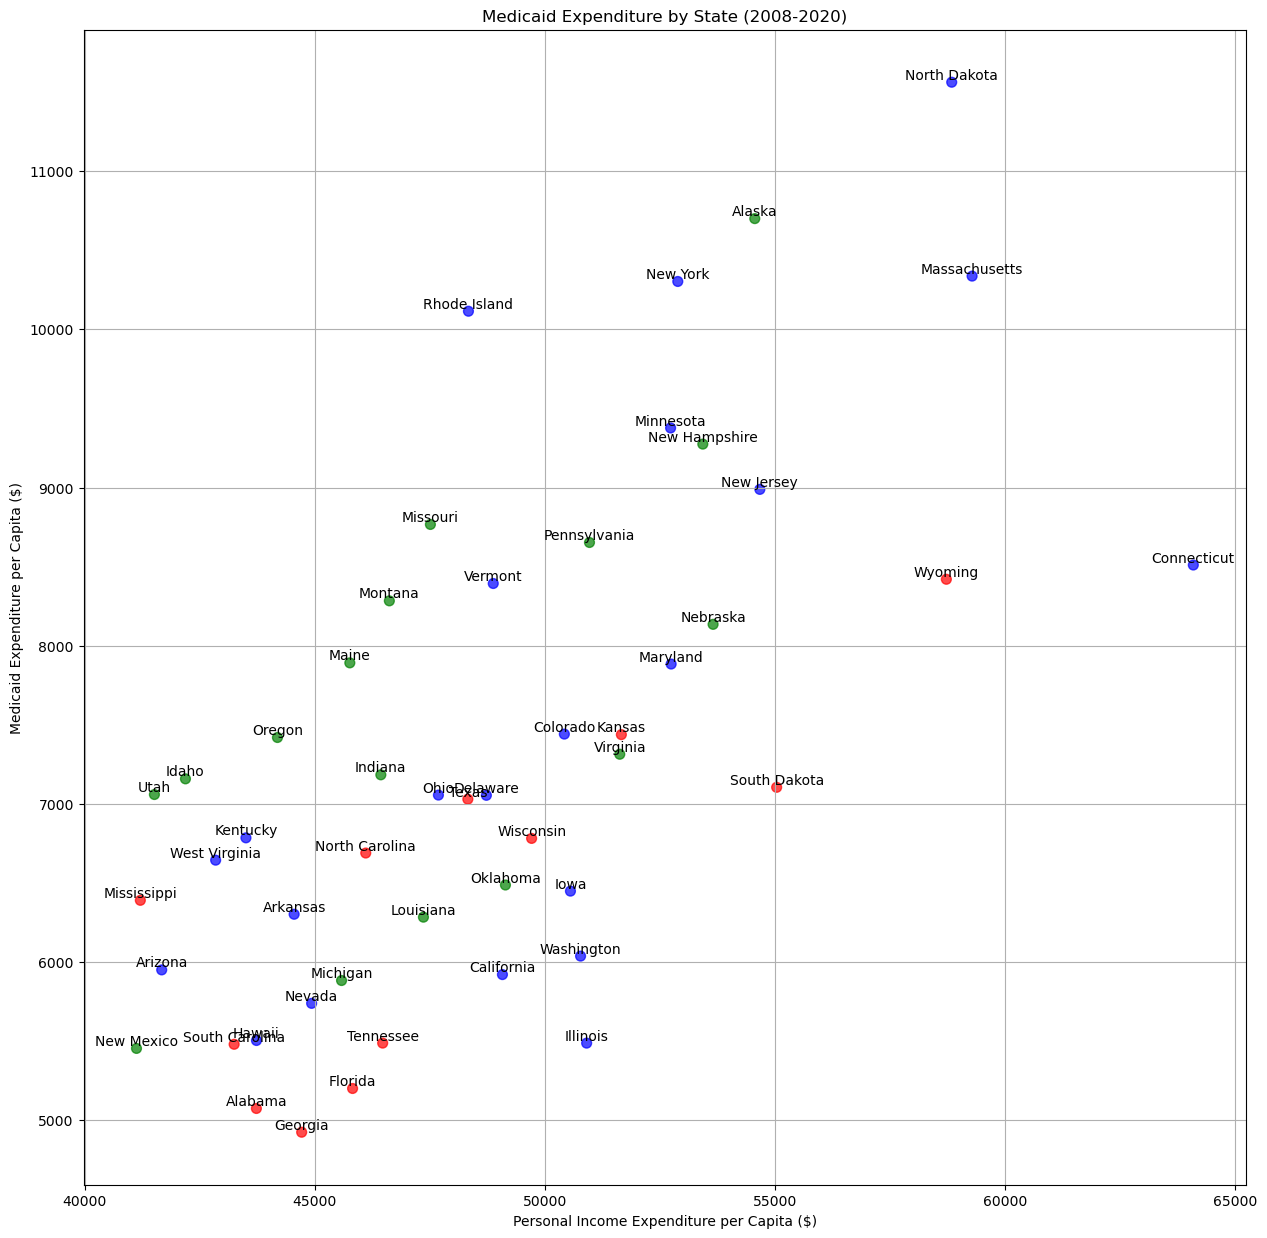

In [10]:
user = 'postgres' # Your username (try entering pgadmin to find)
password = 'Enter123' # Your Password
host = 'localhost'
port = '5432'
database_name = 'Healthcare_DB'

connection = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database_name}'
engine = create_engine(connection)
with engine.connect() as connection:
    query = text("SELECT * FROM realincome;")
    query2 = text("SELECT * FROM home_health;")
    print(df2)
    df2 = pd.read_sql(query2, connection)
    df = pd.read_sql(query, connection)

connection.close()

df2_mean = df2.drop(columns={'Region/state of residence'})
df2['home_health'] = df2_mean.mean(axis=1)
df2.index = df2['Region/state of residence']
df2 = df2.drop(index={'New England', 'District of Columbia', 'Great Lakes', 'Mideast', 'United States', 'Southeast',
                     'Southwest', 'Rocky Mountains', 'Far West'})
df2 = df2.sort_index()
df2 = df2['home_health']

df = df.drop(columns={'2021', '2022'})
df_mean = df.drop(columns={'Region/state of residence'})
df['inc'] = df_mean.mean(axis=1)
df.index = df['Region/state of residence']
df = df[['inc', '2020']]
df = df.merge(df2, on='Region/state of residence')
df = df.reset_index()
print(df.head())

opt_out = ['Wyoming', 'Texas', 'South Dakota', 'Wisconsin', 'Mississippi', 'Tennessee', 'Alabama', 'Georgia', 'North Carolina',
        'South Carolina', 'Kansas', 'Florida']
upon_adoption = ['Arizona',	'Arkansas',	'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Iowa',
                 'Kentucky', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada', 'New Jersey', 'New York', 'North Dakota',
                 'Ohio', 'Rhode Island', 'Vermont', 'Washington', 'West Virginia']

colors_dict = {'Yes': 'red', 'No': 'blue', 'Adopters': 'green'}

plt.figure(figsize=(15, 15))
colors = [None] * len(df)
for i, row in df.iterrows():
    state = row['Region/state of residence']
    if state in opt_out:
        colors[i] = 'red'
    elif state in upon_adoption:
        colors[i] = 'blue'
    else:
        colors[i] = 'green'

plt.scatter(df['inc'], df['home_health'], s=50, c=colors, alpha=0.7)

for i, (inc, home_health, region) in enumerate(zip(df['inc'], df['home_health'], df['Region/state of residence'])):
    plt.text(inc, home_health + 0.1, region, ha='center', va='bottom', fontsize=10)

plt.xlabel('Personal Income Expenditure per Capita ($)')
plt.ylabel('Medicaid Expenditure per Capita ($)')
plt.title('Medicaid Expenditure by State (2008-2020)')
plt.grid(True)
plt.show()